# Project 1: Digit Classification with KNN and Naive Bayes

In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but <b> please prepare your own write-up (with your own code). </b>

If you're interested, check out these links related to digit recognition:

Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/

Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

In [30]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_mldata
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

Load the data. Notice that we are splitting the data into training, development, and test. We also have a small subset of the training data called mini_train_data and mini_train_labels that you should use in all the experiments below, unless otherwise noted.

In [31]:
# Load the digit data either from mldata.org, or once downloaded to data_home, from disk. The data is about 53MB so this cell
# should take a while the first time your run it.
mnist = fetch_mldata('MNIST original', data_home='~/datasets/mnist')
X, Y = mnist.data, mnist.target

# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print 'data shape: ', X.shape
print 'label shape:', Y.shape

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape:  (70000, 784)
label shape: (70000,)


(1) Create a 10x10 grid to visualize 10 examples of each digit. Python hints:

- plt.rc() for setting the colormap, for example to black and white
- plt.subplot() for creating subplots
- plt.imshow() for rendering a matrix
- np.array.reshape() for reshaping a 1D feature vector into a 2D matrix (for rendering)

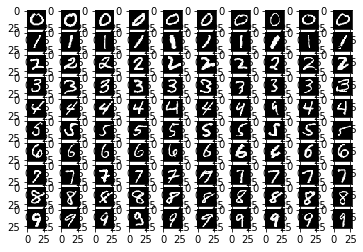

In [32]:
def P1(num_examples=10):
    
### STUDENT START ###    
    
    example_data = ten_examples()
    for index,example in enumerate(example_data):
        digit = np.array(example).reshape((28,28))
        plt.subplot(num_examples,num_examples,index+1)
        plt.imshow(digit, cmap='gray')
    plt.show()

    
def ten_examples():
    digit_count = [0 for i in range(10)]
    example_train_data = [[0 for x in range(len(mini_train_data[1]))] for y in range(100)]
    for index,label in enumerate(mini_train_labels):
        if digit_count == [10 for i in range(10)]:
            break
        elif digit_count[int(label)] == 10:
            pass
        else:
            example_train_data[int(label)*10+digit_count[int(label)]] = mini_train_data[index]
            digit_count[int(label)] += 1
    return example_train_data

### STUDENT END ###
 
P1(10)

(2) Evaluate a K-Nearest-Neighbors model with k = [1,3,5,7,9] using the mini training set. Report accuracy on the dev set. For k=1, show precision, recall, and F1 for each label. Which is the most difficult digit?

- KNeighborsClassifier() for fitting and predicting
- classification_report() for producing precision, recall, F1 results

In [33]:
def P2(k_values):

### STUDENT START ###
    for value in k_values:
        # fitting and predicting
        neigh = KNeighborsClassifier(n_neighbors=value)
        neigh.fit(mini_train_data,mini_train_labels)
        y_pred = neigh.predict(dev_data)
        
        print "Accuracy = ", accuracy_score(dev_labels, y_pred)
        
        # producing precision, recall, F1 results
        print "Classification Report k =",value
        print classification_report(dev_labels,y_pred)
        print
        
### STUDENT END ###

k_values = [1, 3, 5, 7, 9]
P2(k_values)

Accuracy =  0.888
Classification Report k = 1
             precision    recall  f1-score   support

        0.0       0.91      0.98      0.94        99
        1.0       0.89      1.00      0.94       105
        2.0       0.99      0.79      0.88       102
        3.0       0.77      0.87      0.82        86
        4.0       0.89      0.82      0.85       104
        5.0       0.93      0.84      0.88        91
        6.0       0.94      0.96      0.95        98
        7.0       0.89      0.92      0.90       113
        8.0       0.94      0.88      0.91        96
        9.0       0.78      0.82      0.80       106

avg / total       0.89      0.89      0.89      1000


Accuracy =  0.878
Classification Report k = 3
             precision    recall  f1-score   support

        0.0       0.90      1.00      0.95        99
        1.0       0.81      1.00      0.89       105
        2.0       0.95      0.81      0.88       102
        3.0       0.69      0.84      0.75        86
  

ANSWER: 3 is the most difficult digit.

(3) Using k=1, report dev set accuracy for the training set sizes below. Also, measure the amount of time needed for prediction with each training size.

- time.time() gives a wall clock value you can use for timing operations

In [34]:
def P3(train_sizes, accuracies):

### STUDENT START ###

    for size in train_sizes:
        sized_train_data, sized_train_labels = X[:size], Y[:size]
        n_neigh = 1
        
        start = time.time()
        neigh = KNeighborsClassifier(n_neighbors=n_neigh)
        neigh.fit(sized_train_data,sized_train_labels)
        y_pred = neigh.predict(dev_data)
        end = time.time()

        accuracy = accuracy_score(dev_labels, y_pred)
        accuracies.append(accuracy) 
        
        if (size == train_sizes[0]): 
            print " size  | time (s) | accuracy (%)"
        print "%6d |  %2.3f   | %1.3f" % (size,end-start,accuracy)

### STUDENT END ###

train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000]
accuracies = []
P3(train_sizes, accuracies)

 size  | time (s) | accuracy (%)
   100 |  0.183   | 0.720
   200 |  0.342   | 0.786
   400 |  1.126   | 0.841
   800 |  2.295   | 0.884
  1600 |  3.391   | 0.902
  3200 |  6.871   | 0.926
  6400 |  13.687   | 0.937
 12800 |  28.158   | 0.959
 25000 |  62.597   | 0.970


(4) Fit a regression model that predicts accuracy from training size. What does it predict for n=60000? What's wrong with using regression here? Can you apply a transformation that makes the predictions more reasonable?

- Remember that the sklearn fit() functions take an input matrix X and output vector Y. So each input example in X is a vector, even if it contains only a single value.

In [35]:
def P4():
    
### STUDENT START ###

    # make each size in train_size into a vector
    X_train_sizes = [[size] for size in train_sizes]
    lin = LinearRegression()
    lin.fit(X_train_sizes,accuracies)

    print "A linear regression model from the data would be Accuracy = %1.3e * Size + %1.3f" % (lin.coef_[0],lin.intercept_)
    print "For n=60000, the linear model predicts %1.3f" % lin.predict(60000)[0] 
    
### STUDENT END ###

P4()

A linear regression model from the data would be Accuracy = 6.665e-06 * Size + 0.843
For n=60000, the linear model predicts 1.243


ANSWER: Linear regression is a problem here because 1.0 should be the maximum accuracy. A log transformation makes the prediction more reasonable.

Fit a 1-NN and output a confusion matrix for the dev data. Use the confusion matrix to identify the most confused pair of digits, and display a few example mistakes.

- confusion_matrix() produces a confusion matrix

[[ 97   0   0   0   0   0   2   0   0   0]
 [  0 105   0   0   0   0   0   0   0   0]
 [  4   4  81   4   0   0   0   4   3   2]
 [  1   0   0  75   0   3   0   3   1   3]
 [  0   2   0   0  85   0   3   0   0  14]
 [  2   0   0   9   0  76   0   1   1   2]
 [  1   1   1   0   1   0  94   0   0   0]
 [  1   4   0   1   1   0   0 104   0   2]
 [  0   2   0   5   0   2   1   0  84   2]
 [  1   0   0   3   9   1   0   5   0  87]]


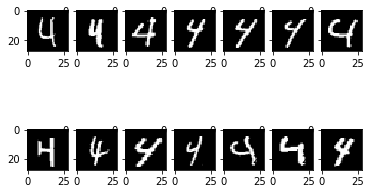

In [37]:
def P5():

### STUDENT START ###

    neigh = KNeighborsClassifier(n_neighbors=1)
    neigh.fit(mini_train_data,mini_train_labels)
    y_pred = neigh.predict(dev_data)
    print confusion_matrix(dev_labels,y_pred)
    
    plot_index = 1
    for index,pred in enumerate(y_pred):
        if int(y_pred[index]) == 9 and int(dev_labels[index]) == 4:
            digit = np.array(dev_data[index]).reshape((28,28))
            plt.subplot(2,7,plot_index)
            plt.imshow(digit, cmap='gray')
            plot_index += 1
    plt.show()
            
    
### STUDENT END ###

P5()

Digits 4 and 9 are the most confused pair of digits. Fourteen 4s were predicted as 9.

(6) A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian -- that is, the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implement a simplified Gaussian blur by just using the 8 neighboring pixels: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values. Try applying your blur filter in 3 ways:
- preprocess the training data but not the dev data
- preprocess the dev data but not the training data
- preprocess both training and dev data

Note that there are Guassian blur filters available, for example in scipy.ndimage.filters. You're welcome to experiment with those, but you are likely to get the best results with the simplified version I described above.

In [130]:
from scipy.ndimage import gaussian_filter
def P6():
    
### STUDENT START ###

    # preprocess the training data but not the dev data
    neigh1 = KNeighborsClassifier(n_neighbors=1)
    neigh1.fit(blur(mini_train_data),mini_train_labels)
    y_pred1 = neigh1.predict(dev_data)       
    print "Preprocess the training data but not the dev data : Accuracy = ", accuracy_score(dev_labels, y_pred1)
    
    # preprocess the dev data but not the training data
    neigh2 = KNeighborsClassifier(n_neighbors=1)
    neigh2.fit(mini_train_data,mini_train_labels)
    y_pred2 = neigh2.predict(blur(dev_data))       
    print "Preprocess the dev data but not the training data : Accuracy = ", accuracy_score(dev_labels, y_pred2)
    
    # preprocess both training and dev data
    neigh3 = KNeighborsClassifier(n_neighbors=1)
    neigh3.fit(blur(mini_train_data),mini_train_labels)
    y_pred3 = neigh3.predict(blur(dev_data))       
    print "Preprocess the dev data but not the training data : Accuracy = ", accuracy_score(dev_labels, y_pred3)
    
def blur(input_data):
    output_data = []
    for vector in input_data:
        digit = np.array(vector).reshape((28,28))
        gaussian_digit = gaussian_filter(digit,sigma=1)
        output_data.append(gaussian_digit.flatten())
    return output_data

### STUDENT END ###

P6()

Preprocess the training data but not the dev data : Accuracy =  0.905
Preprocess the dev data but not the training data : Accuracy =  0.865
Preprocess the dev data but not the training data : Accuracy =  0.903


ANSWER: Preprocess the training data but not the dev data resulted in the highest accuracy.

(7) Fit a Naive Bayes classifier and report accuracy on the dev data. Remember that Naive Bayes estimates P(feature|label). While sklearn can handle real-valued features, let's start by mapping the pixel values to either 0 or 1. You can do this as a preprocessing step, or with the binarize argument. With binary-valued features, you can use BernoulliNB. Next try mapping the pixel values to 0, 1, or 2, representing white, grey, or black. This mapping requires MultinomialNB. Does the multi-class version improve the results? Why or why not?

In [79]:
def P7():

### STUDENT START ###

    bnb = BernoulliNB(binarize=0.5)
    bnb.fit(mini_train_data,mini_train_labels)
    y_pred = bnb.predict(dev_data)
    print "BernoulliNB accuracy = %2.3f" % accuracy_score(dev_labels, y_pred)
    

    mapped_mini_train_data = pixel_map(mini_train_data)            
    mapped_dev_data = pixel_map(dev_data)
        
    mnb = MultinomialNB()
    mnb.fit(mapped_mini_train_data,mini_train_labels)
    y_pred = mnb.predict(mapped_dev_data)
    print "MultinomialNB accuracy = %2.3f" % accuracy_score(dev_labels, y_pred)
    
def pixel_map(input_data):
    output_data = [[0 for x in range(len(input_data[1]))] for y in range(len(input_data))] 
    for v_index, vector in enumerate(input_data):
        for e_index, elem in enumerate(vector):
            if elem < 0.001:
                pass
            elif elem < 0.5 and elem > 0.001:
                output_data[v_index][e_index] = 1
            else:
                output_data[v_index][e_index] = 2
    return output_data

### STUDENT END ###

P7()

BernoulliNB accuracy = 0.815
MultinomialNB accuracy = 0.795


ANSWER: The mulit-class version does not improve the accuracy. The Bernoulli Naive Bayes improves accuracy for the same reason that blurring improves accuracy. These techniques smooth irregularities and create vectors with closer euclidean distance. They reduce the risk of overfitting.

(8) Use GridSearchCV to perform a search over values of alpha (the Laplace smoothing parameter) in a Bernoulli NB model. What is the best value for alpha? What is the accuracy when alpha=0? Is this what you'd expect?

- Note that GridSearchCV partitions the training data so the results will be a bit different than if you used the dev data for evaluation.

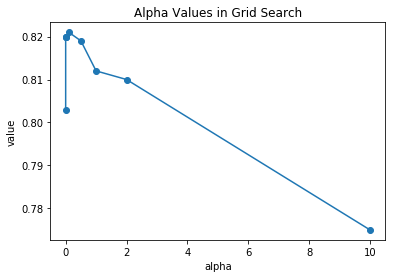

In [39]:
def P8(alphas):

### STUDENT START ###

    gscv = GridSearchCV(BernoulliNB(), [alphas])
    gscv.fit(mini_train_data,mini_train_labels) # running the grid search
    plot_grid_search(gscv)
    return gscv

def plot_grid_search(grid_search):
    # Method to plot the grid search is an adaptation of
    # https://glowingpython.blogspot.com/2014/04/
    res = zip(*[(f1m, f1s.std(), p['alpha']) 
            for p, f1m, f1s in grid_search.grid_scores_])
    plt.plot(res[2],res[0],'-o')
    plt.title("Alpha Values in Grid Search")
    plt.ylabel("value")
    plt.xlabel("alpha")
    plt.show()    

### STUDENT END ###

alphas = {'alpha': [0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
nb = P8(alphas)

In [29]:
print nb.best_params_

{'alpha': 0.001}


ANSWER: As the plot above indicates, the alpha at 0 is less than it is at 0.001. The alpha increases from zero to 0.001, then decreases from 0.001 to 10.0.

(9) Try training a model using GuassianNB, which is intended for real-valued features, and evaluate on the dev data. You'll notice that it doesn't work so well. Try to diagnose the problem. You should be able to find a simple fix that returns the accuracy to around the same rate as BernoulliNB. Explain your solution.

Hint: examine the parameters estimated by the fit() method, theta\_ and sigma\_.

In [78]:
def P9():

### STUDENT END ###

    gnb = GaussianNB()
    gnb.fit(mini_train_data,mini_train_labels)
    y_pred = gnb.predict(dev_data)
    
    print "GaussianNB accuracy = ",accuracy_score(dev_labels, y_pred)
    #print "theta_ = ",gnb.theta_[0]
    #print "sigma_ = ",gnb.sigma_[0]

    scaled_mini_train_data = normalize(mini_train_data)
    scaled_dev_data = normalize(dev_data)
    
    gnb2 = GaussianNB()
    gnb2.fit(scaled_mini_train_data,mini_train_labels)
    y_pred2 = gnb.predict(scaled_dev_data)
    
    print "Normalized input GaussianNB accuracy = ",accuracy_score(dev_labels, y_pred2)
        
    return gnb    

def normalize(input_data):
    output_data = [[0 for x in range(len(input_data[1]))] for y in range(len(input_data))] 
    for v_index, vector in enumerate(input_data):
        mean = input_data[v_index].mean()
        std  = input_data[v_index].std()
        for e_index, elem in enumerate(vector):
            if input_data[v_index][e_index] > 0:
                output_data[v_index][e_index] = (input_data[v_index][e_index] - mean) / std
    return output_data

### STUDENT END ###

gnb = P9()

GaussianNB accuracy =  0.621
Normalized input GaussianNB accuracy =  0.69


ANSWER: I could not diagnose the problem. I assumed some transformation of the data would improve the accuracy but I could not identify a working transformation.

(10) Because Naive Bayes is a generative model, we can use the trained model to generate digits. Train a BernoulliNB model and then generate a 10x20 grid with 20 examples of each digit. Because you're using a Bernoulli model, each pixel output will be either 0 or 1. How do the generated digits compare to the training digits?

- You can use np.random.rand() to generate random numbers from a uniform distribution
- The estimated probability of each pixel is stored in feature\_log\_prob\_. You'll need to use np.exp() to convert a log probability back to a probability.

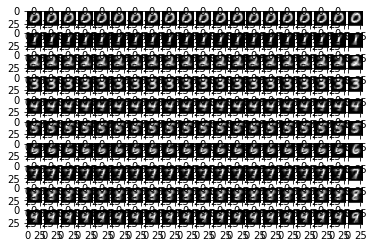

In [100]:
def P10(num_examples):

### STUDENT START ###

    bnb = BernoulliNB(binarize=0.5)
    bnb.fit(mini_train_data,mini_train_labels)
    est_prob = np.exp(bnb.feature_log_prob_)
    
    plot_index = 1
    for prob in est_prob:
        for example in range(num_examples):
            digit = np.array(randomize(prob)).reshape((28,28))
            plt.subplot(10,num_examples,plot_index)
            plt.imshow(digit, cmap='gray')
            plot_index += 1
    plt.show()

def randomize(input):
    output = [0 for i in input]
    for elem in input:
        output = input*np.random.rand()
    return output

### STUDENT END ###

P10(20)

ANSWER: The generated digits are more similar to each other than the training data.

(11) Remember that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior and accuracy.

Train a BernoulliNB model with a reasonable alpha value. For each posterior bucket (think of a bin in a histogram), you want to estimate the classifier's accuracy. So for each prediction, find the bucket the maximum posterior belongs to and update the "correct" and "total" counters.

How would you characterize the calibration for the Naive Bayes model?

In [118]:
def P11(buckets, correct, total):
    
### STUDENT START ###

    bnb = BernoulliNB(binarize=0.5,alpha=0.001)
    bnb.fit(mini_train_data,mini_train_labels)
    
    y_pred = bnb.predict(dev_data)
    
    accuracy = 0
    for index,pred in enumerate(y_pred):
        pred_accuracy = accuracy_score([dev_labels[index]], [y_pred[index]])
        if pred_accuracy > buckets[0]:
            bucket_index = buckets.index(pred_accuracy)
            correct[bucket_index] += 1
            total[bucket_index] += 1
        else:
            total[0] += 1
        accuracy += pred_accuracy
        
    print "accuracy =",accuracy/len(y_pred)
    
                
### STUDENT END ###

buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
correct = [0 for i in buckets]
total = [0 for i in buckets]

P11(buckets, correct, total)

for i in range(len(buckets)):
    accuracy = 0.0
    if (total[i] > 0): accuracy = correct[i] / total[i]
    print 'p(pred) <= %.13f    total = %3d    accuracy = %.3f' %(buckets[i], total[i], accuracy)

accuracy = 0.819
p(pred) <= 0.5000000000000    total = 181    accuracy = 0.000
p(pred) <= 0.9000000000000    total =   0    accuracy = 0.000
p(pred) <= 0.9990000000000    total =   0    accuracy = 0.000
p(pred) <= 0.9999900000000    total =   0    accuracy = 0.000
p(pred) <= 0.9999999000000    total =   0    accuracy = 0.000
p(pred) <= 0.9999999990000    total =   0    accuracy = 0.000
p(pred) <= 0.9999999999900    total =   0    accuracy = 0.000
p(pred) <= 0.9999999999999    total =   0    accuracy = 0.000
p(pred) <= 1.0000000000000    total = 819    accuracy = 1.000


ANSWER: The calibration of the BernoulliNB model is slightly improved over the default configuration.

(12) EXTRA CREDIT

Try designing extra features to see if you can improve the performance of Naive Bayes on the dev set. Here are a few ideas to get you started:
- Try summing the pixel values in each row and each column.
- Try counting the number of enclosed regions; 8 usually has 2 enclosed regions, 9 usually has 1, and 7 usually has 0.

Make sure you comment your code well!

In [18]:
#def P12():

### STUDENT START ###


### STUDENT END ###

#P12()